**INTRODUCTION**

Ho Chi Minh City, Vietnam also commonly referred to as Saigon is the largest city of Vietnam. According to the 2019 census, Ho Chi Minh City has a population of over 8.9 million within city proper and over 21 million within the metropolitan area. Ho Chi Minh City is the economic and financial centre of Vietnam, and plays an important role in the country's culture and scientific developments. Ho Chi Minh City is an emerging international tourist destination, with popular landmarks related to the remnants of its colonial past showcased through colonial architecture [wikipedia]. With the advantage of geography location as well as the delelopment of economic and travelling, Ho Chi Minh city is one of the best place for foreigners for living and investments.

Tom is one of my best foreigner friend who wants to move to Ho Chi Minh City for living the retired life and also want to open a Café shop in Ho Chi Minh to earn the living cost. Because he just came to Vietnam several times, so he does not know much about Ho Chi Minh City life and environment. He knocks my door to ask about Ho Chi Minh City and help him to buy house which has the same convenient place around as his current house in his country. He also asked me to collect the data of extisting coffee shope in Ho Chi Minh city which can help him to prevent openning the coffee shop at which has many coffee shop nearby to reduce the competition.

The business problem:

[1] Find the best place which has the same convenient place as his current house in his country to buy a house

[2] collect the data of extisting coffee shope in Ho Chi Minh city which can help him to prevent openning the coffee shop at which has many coffee shop nearby.



**DATA PREPROCESSING**

The data is collected at an open source in Github which has the information of the ward and district of Ho Chi Minh City. In this section, I would like to use some supported code for data processing such as Adding The Latitude and Longitude by call Google Geocode API,  Using the Foursquare API to explore the neighborhoods and See the top 5 venues near by HCM, and Exploratory Data Analysis: Find the most Venue Category in HoCHiMinh City


*1. Importing necessary Libraries*

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


*2. Download and Explore Dataset*


In [3]:
df = pd.read_excel ('/content/drive/My Drive/ST/DS/[1] PROJECT/[3] IBM FINAL PROJECT/HoChiMinhCity.xlsx')
df.head()

,Unnamed: 0,ward,district,area
0,9214,Phường Tân Định,Quận 1,"Phường Tân Định, Quận 1"
1,9215,Phường Đa Kao,Quận 1,"Phường Đa Kao, Quận 1"
2,9216,Phường Bến Nghé,Quận 1,"Phường Bến Nghé, Quận 1"
3,9217,Phường Bến Thành,Quận 1,"Phường Bến Thành, Quận 1"
4,9218,Phường Nguyễn Thái Bình,Quận 1,"Phường Nguyễn Thái Bình, Quận 1"


*3. Add The Latitude and Longitude by call Google Geocode API*


Find the geograpical coordinate of Ho Chi Minh city

In [2]:
address = 'Ho Chi Minh, VN'
geolocator = Nominatim(user_agent="HCM")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ho Chi Minh are {}, {}.'.format(latitude, longitude))
HCMlat = latitude
HCMlong = longitude

The geograpical coordinate of Ho Chi Minh are 10.7758439, 106.7017555.


In [4]:
lat = []
lon = []
for i in range(len(df)) : 
    s = df.iloc[i, 2] + ", Hồ Chí Minh"
    address = s
    geolocator = Nominatim(user_agent="HCM")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    lon.append(longitude)
df['Lat'] = lat
df['lon'] = lon

In [5]:
df.head()

,Unnamed: 0,ward,district,area,Lat,lon
0,9214,Phường Tân Định,Quận 1,"Phường Tân Định, Quận 1",10.77454,106.699184
1,9215,Phường Đa Kao,Quận 1,"Phường Đa Kao, Quận 1",10.77454,106.699184
2,9216,Phường Bến Nghé,Quận 1,"Phường Bến Nghé, Quận 1",10.77454,106.699184
3,9217,Phường Bến Thành,Quận 1,"Phường Bến Thành, Quận 1",10.77454,106.699184
4,9218,Phường Nguyễn Thái Bình,Quận 1,"Phường Nguyễn Thái Bình, Quận 1",10.77454,106.699184


In [6]:
# create map of Toronto using latitude and longitude values
map_HCM = folium.Map(location=[HCMlat, HCMlong], zoom_start=11)

# add markers to map
for Lat, lon, area in zip(df['Lat'], df['lon'], df['area']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HCM)  
    
map_HCM

*4. Use the Foursquare API to explore the neighborhoods*


Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = '4UFDWNUONKDOUURIIQVJDH2FJBOQKVS1YSFSUT4KKU1XKXDS' # your Foursquare ID
CLIENT_SECRET = '3UKE1TKWPRSD1LHPQ0CLFRZ0MS3C14KXOZ0QQGRO1NCH0EHA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4UFDWNUONKDOUURIIQVJDH2FJBOQKVS1YSFSUT4KKU1XKXDS
CLIENT_SECRET:3UKE1TKWPRSD1LHPQ0CLFRZ0MS3C14KXOZ0QQGRO1NCH0EHA


Now, let's get the top 100 venues that are in Ho Chi Minh City within a radius of 500 meters.



In [8]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
HCM_venues = getNearbyVenues(names=df['area'],
                                   latitudes=df['Lat'],
                                   longitudes=df['lon']
                                  )

Phường Tân Định, Quận 1
Phường Đa Kao, Quận 1
Phường Bến Nghé, Quận 1
Phường Bến Thành, Quận 1
Phường Nguyễn Thái Bình, Quận 1
Phường Phạm Ngũ Lão, Quận 1
Phường Cầu Ông Lãnh, Quận 1
Phường Cô Giang, Quận 1
Phường Nguyễn Cư Trinh, Quận 1
Phường Cầu Kho, Quận 1
Phường Thạnh Xuân, Quận 12
Phường Thạnh Lộc, Quận 12
Phường Hiệp Thành, Quận 12
Phường Thới An, Quận 12
Phường Tân Chánh Hiệp, Quận 12
Phường An Phú Đông, Quận 12
Phường Tân Thới Hiệp, Quận 12
Phường Trung Mỹ Tây, Quận 12
Phường Tân Hưng Thuận, Quận 12
Phường Đông Hưng Thuận, Quận 12
Phường Tân Thới Nhất, Quận 12
Phường Linh Xuân, Quận Thủ Đức
Phường Bình Chiểu, Quận Thủ Đức
Phường Linh Trung, Quận Thủ Đức
Phường Tam Bình, Quận Thủ Đức
Phường Tam Phú, Quận Thủ Đức
Phường Hiệp Bình Phước, Quận Thủ Đức
Phường Hiệp Bình Chánh, Quận Thủ Đức
Phường Linh Chiểu, Quận Thủ Đức
Phường Linh Tây, Quận Thủ Đức
Phường Linh Đông, Quận Thủ Đức
Phường Bình Thọ, Quận Thủ Đức
Phường Trường Thọ, Quận Thủ Đức
Phường Long Bình, Quận 9
Phường Long Thạn

In [12]:
#Convert diffent name of coffee shop to Café
HCM_venues.loc[HCM_venues['Venue Category'] == 'Coffee Shop', 'Venue Category'] = 'Café'
HCM_venues.loc[HCM_venues['Venue Category'] == 'Pet Café', 'Venue Category'] = 'Café'

*5. See the top 5 venues near by HCM*


In [13]:
# one hot encoding
HCM_onehot = pd.get_dummies(HCM_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HCM_onehot['Neighborhood'] = HCM_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [HCM_onehot.columns[-1]] + list(HCM_onehot.columns[:-1])
HCM_onehot = HCM_onehot[fixed_columns]

HCM_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Furniture / Home Store,Gym / Fitness Center,Hawaiian Restaurant,Hotel,Hotpot Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Multiplex,Noodle House,Opera House,Piano Bar,Pizza Place,Playground,Restaurant,Rock Club,Seafood Restaurant,Shopping Mall,Snack Place,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Travel Agency,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Women's Store,Yoga Studio
0,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
HCM_grouped = HCM_onehot.groupby('Neighborhood').mean().reset_index()


In [15]:
num_top_venues = 5

for hood in HCM_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HCM_grouped[HCM_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Phường 1, Quận 10----
                   venue  freq
0                   Café  0.44
1  Vietnamese Restaurant  0.22
2      Hotpot Restaurant  0.04
3              Bookstore  0.04
4                    Spa  0.04


----Phường 1, Quận 11----
                 venue  freq
0                 Café  0.75
1          Pizza Place  0.25
2  American Restaurant  0.00
3            Multiplex  0.00
4            Rock Club  0.00


----Phường 1, Quận 3----
                   venue  freq
0                   Café  0.20
1  Vietnamese Restaurant  0.17
2              BBQ Joint  0.07
3      French Restaurant  0.05
4       Asian Restaurant  0.05


----Phường 1, Quận 4----
                    venue  freq
0      Seafood Restaurant   0.5
1             Snack Place   0.2
2     Japanese Restaurant   0.1
3   Vietnamese Restaurant   0.1
4  Furniture / Home Store   0.1


----Phường 1, Quận 5----
                   venue  freq
0     Chinese Restaurant  0.16
1           Noodle House  0.12
2     Dim Sum Restaurant  0.12
3  

*6. Exploratory Data Analysis: Find the most Venue Category in HoCHiMinh City*


In [16]:
HCM_Plot = HCM_venues.groupby('Venue Category').count()
HCM_Plot.to_csv('X.csv')
HCM_Plot = pd.read_csv('X.csv') 
HCM_Plot.head()

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,American Restaurant,15,15,15,15,15,15
1,Arts & Crafts Store,15,15,15,15,15,15
2,Asian Restaurant,127,127,127,127,127,127
3,BBQ Joint,127,127,127,127,127,127
4,Badminton Court,30,30,30,30,30,30


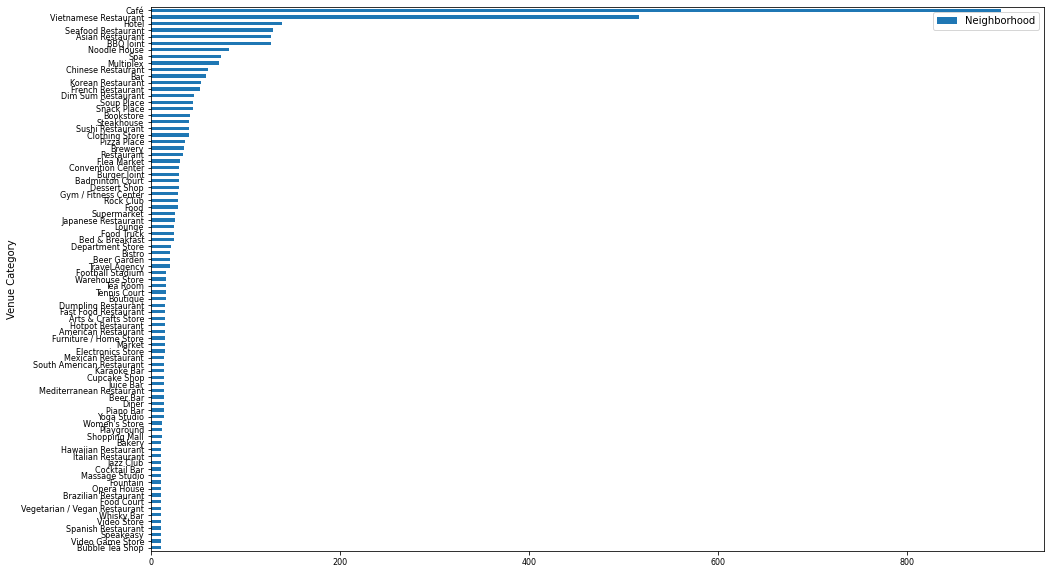

In [44]:
import matplotlib.pyplot as plt
HCM_Plot.sort_values('Neighborhood',inplace=True)
HCM_Plot.plot.barh(x='Venue Category', y='Neighborhood', fontsize = 8, figsize=(16, 10))
plt.savefig("HCM_Plot.png")